# Exploración visual

Images shape:  (416, 512, 192)
Segmentation shape:  (416, 512, 192)


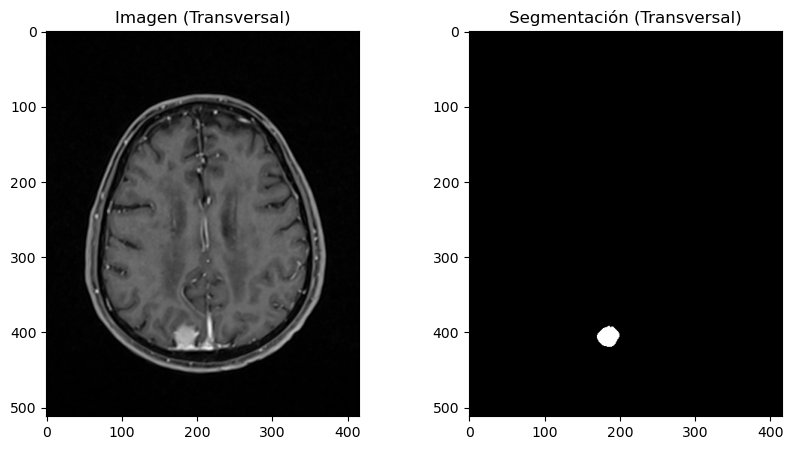

In [37]:
import numpy as np
import nrrd
import os
import matplotlib.pyplot as plt

# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '1'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')
    
# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '13 t1_mpr_tra_iso_fs.nrrd'))
masks, header_masks = nrrd.read(os.path.join(t1, 'Segmentation.seg.nrrd'))

print("Images shape: ", images.shape)
print("Segmentation shape: ", masks.shape)
slice_index = 120

# Reorganizamos los ejes de los datos para obtener el corte transversal
images_reordered = np.transpose(images, (2, 1, 0))
masks_reordered = np.transpose(masks, (2, 1, 0))

# Visualizamos los datos reordenados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images_reordered[slice_index, :, :], cmap='gray')
axes[1].imshow(masks_reordered[slice_index, :, :], cmap='gray')
axes[0].set_title('Imagen (Transversal)')
axes[1].set_title('Segmentación (Transversal)')
plt.show()


# Conversión a formato .npz

In [73]:
# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '1'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
sequences = [os.path.join(rm_basepath, seq) for seq in os.listdir(rm_basepath)]

# Creación de los conjuntos de datos 
npz_ds_path = os.path.join(base_ds_path, '../..', 'npz_dataset')
os.makedirs(npz_ds_path, exist_ok=True)
for seq in sequences:
    os.makedirs(os.path.join(npz_ds_path, os.path.basename(seq)), exist_ok=True)
    print(f'{os.path.basename(seq)} path: {os.path.join(npz_ds_path, os.path.basename(seq))}')

for seq in sequences:
    nrrd_files = [os.path.join(seq, file) for file in os.listdir(seq) if file.endswith('.nrrd')]
    image = [file for file in nrrd_files if os.path.basename(file) != "Segmentation.seg.nrrd"] 
    segmentation = [file for file in nrrd_files if os.path.basename(file) == "Segmentation.seg.nrrd"]

    print("Image:", image)
    print("Segmentation:", segmentation)


T1 path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/T1
T1SIN path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/T1SIN
T2 path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/T2
SUSC path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/SUSC
Image: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1/13 t1_mpr_tra_iso_fs.nrrd']
Segmentation: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1/Segmentation.seg.nrrd']
Image: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1SIN/2 t1_se_sag.nrrd']
Segmentation: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1SIN/Segmentation.seg.nrrd']
Image: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T2/3 t2_tse_tra.nrrd']
Segmentation: ['/home/mariopasc/Python/Datasets/Meningiomas/Origi

In [52]:
# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '1'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')

# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '13 t1_mpr_tra_iso_fs.nrrd'))
masks, header_masks = nrrd.read(os.path.join(t1, 'Segmentation.seg.nrrd'))

# Reorganizamos los ejes de los datos para obtener el corte transversal
images_reordered = np.transpose(images, (2, 1, 0))
masks_reordered = np.transpose(masks, (2, 1, 0))

# Verificamos que las dimensiones de las imágenes y las máscaras coincidan
assert images_reordered.shape == masks_reordered.shape, "Las dimensiones de las imágenes y las máscaras no coinciden"

# Creamos un tensor con una nueva dimensión para los canales
combined = np.stack((images_reordered, masks_reordered), axis=-1)

# Guardamos el tensor en un archivo .npz
output_path = os.path.join(base_ds_path, f'patient_{patient}_t1_images_masks.npz')
np.savez(output_path, combined)

print(f"Archivo guardado en: {output_path}")

Archivo guardado en: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/patient_1_t1_images_masks.npz


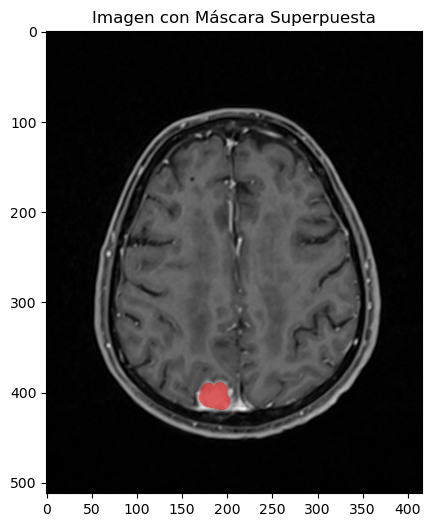

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_slice(npz_path: str, slice_index: int) -> None:
    # Cargamos los datos desde el archivo .npz
    data = np.load(npz_path)
    combined = data['arr_0']

    # Separar las imágenes y las máscaras
    images = combined[..., 0]
    masks = combined[..., 1]

    # Crear una máscara de transparencia
    alpha_mask = np.zeros_like(masks[slice_index, :, :], dtype=float)
    alpha_mask[masks[slice_index, :, :] > 0] = 0.5  # Transparencia para píxeles no cero
    alpha_mask[masks[slice_index, :, :] == 0] = 0  # Completa transparencia para píxeles cero

    # Visualizamos la imagen y la máscara superpuestas
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(images[slice_index, :, :], cmap='gray')
    red_mask = np.zeros((*masks[slice_index, :, :].shape, 4))
    red_mask[..., 0] = 1  # Rojo
    red_mask[..., 3] = alpha_mask  # Canal alpha

    ax.imshow(red_mask)
    ax.set_title('Imagen con Máscara Superpuesta')
    plt.show()

# Ejemplo de uso
npz_path = '/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/patient_1_t1_images_masks.npz'
slice_index = 123
visualize_slice(npz_path, slice_index)


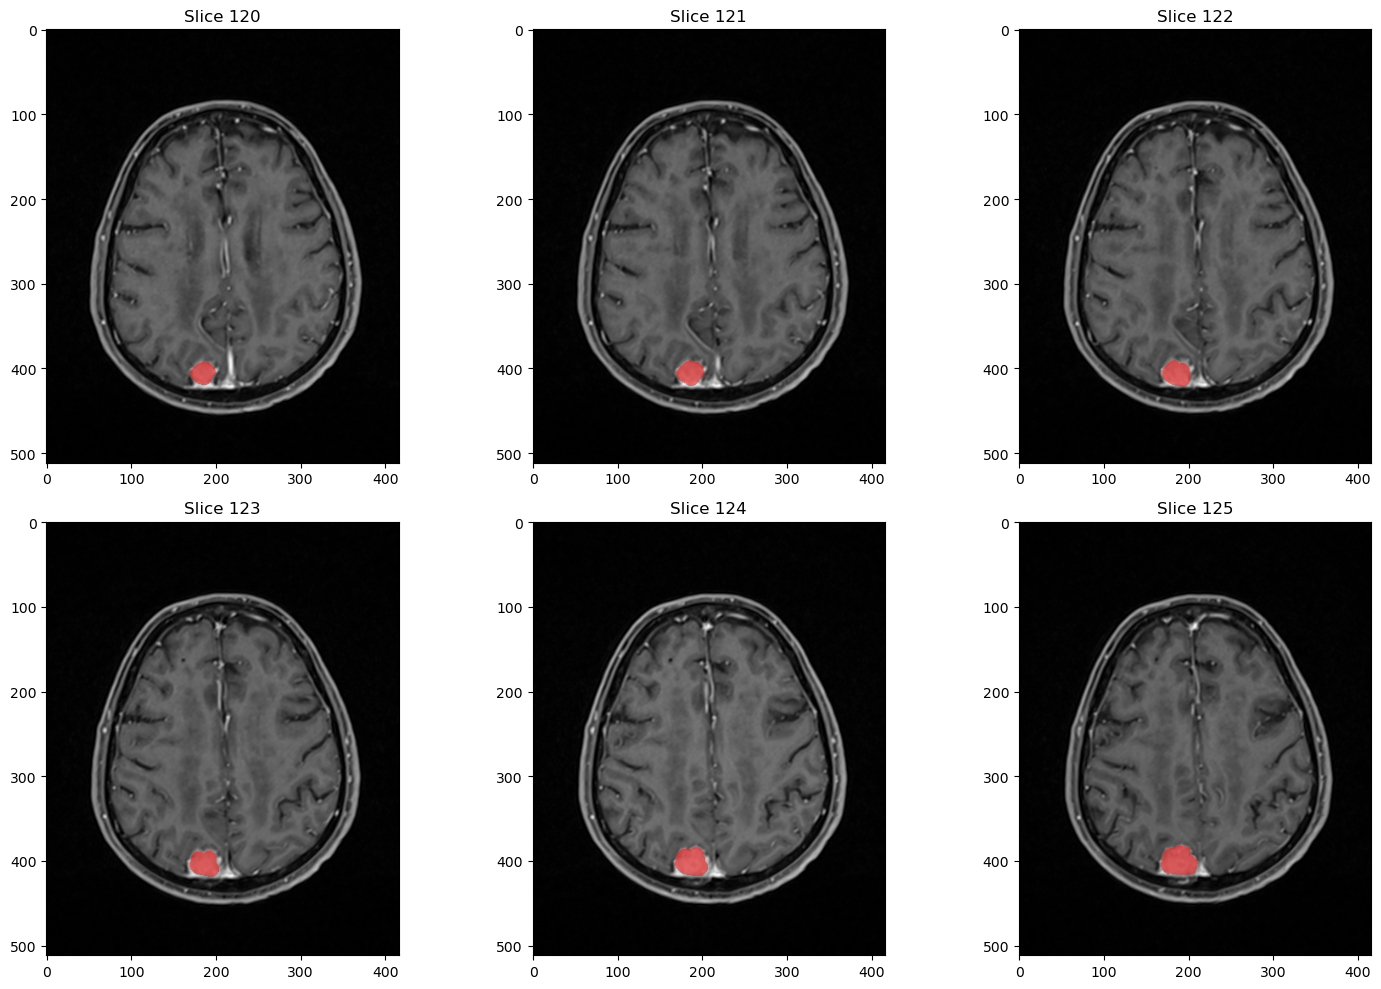

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_slices(npz_path: str, slice_indices: list) -> None:
    # Cargamos los datos desde el archivo .npz
    data = np.load(npz_path)
    combined = data['arr_0']

    # Separar las imágenes y las máscaras
    images = combined[..., 0]
    masks = combined[..., 1]

    # Configuración del subplot
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, slice_index in enumerate(slice_indices):
        if i < 6:
            # Crear una máscara de transparencia
            alpha_mask = np.zeros_like(masks[slice_index, :, :], dtype=float)
            alpha_mask[masks[slice_index, :, :] > 0] = 0.5  # Transparencia para píxeles no cero
            alpha_mask[masks[slice_index, :, :] == 0] = 0  # Completa transparencia para píxeles cero

            # Visualizamos la imagen y la máscara superpuestas
            axes[i].imshow(images[slice_index, :, :], cmap='gray')
            red_mask = np.zeros((*masks[slice_index, :, :].shape, 4))
            red_mask[..., 0] = 1  # Rojo
            red_mask[..., 3] = alpha_mask  # Canal alpha

            axes[i].imshow(red_mask)
            axes[i].set_title(f'Slice {slice_index}')
        else:
            axes[i].axis('off')  # Apaga los ejes si no hay suficientes slices

    for j in range(len(slice_indices), 6):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
npz_path = '/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/patient_1_t1_images_masks.npz'
slice_indices = [120, 121, 122, 123, 124, 125]
visualize_slices(npz_path, slice_indices)


## Generalización

In [75]:
import os
import numpy as np
import nrrd
from typing import Tuple

def load_nrrd_files(path: str) -> np.ndarray:
    try:
        data, header = nrrd.read(path)
        return data
    except Exception as e:
        raise IOError(f"Error loading NRRD file {path}: {e}")

def reorganize_axes(images: np.ndarray, masks: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    try:
        images_reordered = np.transpose(images, (2, 1, 0))
        masks_reordered = np.transpose(masks, (2, 1, 0))
        return images_reordered, masks_reordered
    except Exception as e:
        raise ValueError(f"Error reorganizing axes: {e}")

# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient_id = '70'  # Cambia esto al ID del paciente con el problema
rm_basepath = os.path.join(base_ds_path, patient_id, 'RM')
sequences = [os.path.join(rm_basepath, seq) for seq in os.listdir(rm_basepath)]

# Procesamos cada secuencia
for seq in sequences:
    try:
        sequence_type = os.path.basename(seq)
        nrrd_files = [os.path.join(seq, file) for file in os.listdir(seq) if file.endswith('.nrrd')]
        image_path = [file for file in nrrd_files if os.path.basename(file) != "Segmentation.seg.nrrd"][0]
        mask_path = [file for file in nrrd_files if os.path.basename(file) == "Segmentation.seg.nrrd"][0]

        # Cargamos las imágenes y las máscaras
        images = load_nrrd_files(image_path)
        masks = load_nrrd_files(mask_path)

        # Imprimimos las formas originales
        print(f"Sequence: {sequence_type}")
        print(f"Original image shape: {images.shape}")
        print(f"Original mask shape: {masks.shape}")

        # Reorganizamos los ejes
        images_reordered, masks_reordered = reorganize_axes(images, masks)

        # Imprimimos las formas reorganizadas
        print(f"Reorganized image shape: {images_reordered.shape}")
        print(f"Reorganized mask shape: {masks_reordered.shape}")
        
        # Comprobamos si las formas coinciden antes de combinar
        if images_reordered.shape != masks_reordered.shape:
            print(f"Shapes do not match for patient {patient_id}, sequence {sequence_type}")

    except Exception as e:
        print(f"Error processing sequence {sequence_type} for patient {patient_id}: {e}")


Sequence: T1
Original image shape: (416, 512, 192)
Original mask shape: (416, 512, 192)
Reorganized image shape: (192, 512, 416)
Reorganized mask shape: (192, 512, 416)
Sequence: T1SIN
Original image shape: (416, 512, 192)
Original mask shape: (416, 512, 192)
Reorganized image shape: (192, 512, 416)
Reorganized mask shape: (192, 512, 416)
Sequence: T2
Original image shape: (320, 320, 23)
Original mask shape: (416, 512, 192)
Reorganized image shape: (23, 320, 320)
Reorganized mask shape: (192, 512, 416)
Shapes do not match for patient 70, sequence T2
